In [1]:
import matplotlib.pyplot as plt    #--- for plotting ---
import numpy as np                 #--- linear algebra ---
import pandas as pd                #--- data processing, CSV file I/O (e.g. pd.read_csv) ---
import seaborn as sns              #--- for plotting and visualizations ---

# Input data files are available in the "../input/" directory.
train_df = pd.read_csv('/Users/riyachanduka/Documents/train.csv')
test_df = pd.read_csv('/Users/riyachanduka/Desktop/test.csv')

#--- Let's peek into the data
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [2]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# Adding Haversine Distance

In [3]:
from math import radians, cos, sin, asin, sqrt   #--- for the mathematical operations involved in the function ---

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

train_df['Haversine_dist'] = train_df.apply(lambda x: haversine(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)
test_df['Haversine_dist'] = test_df.apply(lambda x: haversine(x['pickup_longitude'], x['pickup_latitude'], x['dropoff_longitude'], x['dropoff_latitude']), axis=1)
#train_df['Haversine_dist'] = haversine(train_df['pickup_longitude'], train_df['pickup_latitude'],train_df['dropoff_longitude'], train_df['dropoff_latitude'])
#print (train_df.head())

In [4]:
def arrays_bearing(lats1, lngs1, lats2, lngs2, R=6371):
    lats1_rads = np.radians(lats1)
    lats2_rads = np.radians(lats2)
    lngs1_rads = np.radians(lngs1)
    lngs2_rads = np.radians(lngs2)
    lngs_delta_rads = np.radians(lngs2 - lngs1)
    
    y = np.sin(lngs_delta_rads) * np.cos(lats2_rads)
    x = np.cos(lats1_rads) * np.sin(lats2_rads) - np.sin(lats1_rads) * np.cos(lats2_rads) * np.cos(lngs_delta_rads)
    
    return np.degrees(np.arctan2(y, x))

train_df['bearing_dist'] = arrays_bearing(
train_df['pickup_latitude'], train_df['pickup_longitude'], 
train_df['dropoff_latitude'], train_df['dropoff_longitude'])

test_df['bearing_dist'] = arrays_bearing(
test_df['pickup_latitude'], test_df['pickup_longitude'], 
test_df['dropoff_latitude'], test_df['dropoff_longitude'])

In [5]:
train_df['Manhattan_dist'] = \
    (train_df['dropoff_longitude'] - train_df['pickup_longitude']).abs() + \
    (train_df['dropoff_latitude'] - train_df['pickup_latitude']).abs()
    
test_df['Manhattan_dist'] = \
    (test_df['dropoff_longitude'] - test_df['pickup_longitude']).abs() + \
    (test_df['dropoff_latitude'] - test_df['pickup_latitude']).abs()    
    
#print(train_df.head())  
#print(test_df.head())  

In [6]:
#--- Taken from Part 2 ---
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
train_df['dropoff_datetime'] = pd.to_datetime(train_df['dropoff_datetime'])

train_df['pickup_month'] = train_df.pickup_datetime.dt.month.astype(np.uint8)
train_df['pickup_day'] = train_df.pickup_datetime.dt.weekday.astype(np.uint8)
train_df['pickup_hour'] = train_df.pickup_datetime.dt.hour.astype(np.uint8)

train_df['dropoff_month'] = train_df.dropoff_datetime.dt.month.astype(np.uint8)
train_df['dropoff_day'] = train_df.dropoff_datetime.dt.weekday.astype(np.uint8)
train_df['dropoff_hour'] = train_df.dropoff_datetime.dt.hour.astype(np.uint8)
#print (train_df.head())

#--- Doing the same for the test data excluding dropoff time ---
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])

test_df['pickup_month'] = test_df.pickup_datetime.dt.month.astype(np.uint8)
test_df['pickup_day'] = test_df.pickup_datetime.dt.weekday.astype(np.uint8)
test_df['pickup_hour'] = test_df.pickup_datetime.dt.hour.astype(np.uint8)

#print (test_df.head())

In [7]:
train_df['trip_duration_mins'] = train_df['trip_duration'] / 60
train_df['trip_duration_hours'] = train_df['trip_duration_mins'] / 60
#print (train_df.head())

# Removing Outliers

In [8]:
print(max(train_df['trip_duration_hours']))
print(min(train_df['trip_duration_hours']))
print(train_df['trip_duration_hours'].describe())

979.5227777777778
0.0002777777777777778
count    1.458644e+06
mean     2.665256e-01
std      1.454842e+00
min      2.777778e-04
25%      1.102778e-01
50%      1.838889e-01
75%      2.986111e-01
max      9.795228e+02
Name: trip_duration_hours, dtype: float64


In [9]:
print (train_df[train_df['trip_duration_hours'] > 5].count()['id'])
print (len(train_df))

2072
1458644


In [10]:
train_df.drop(train_df[train_df.trip_duration_hours > 5].index, inplace=True)
print (len(train_df))

1456572


In [11]:
print(max(train_df['trip_duration_hours']))
print(min(train_df['trip_duration_hours']))

print(train_df['trip_duration_hours'].describe())

4.823055555555555
0.0002777777777777778
count    1.456572e+06
mean     2.325360e-01
std      1.837520e-01
min      2.777778e-04
25%      1.102778e-01
50%      1.838889e-01
75%      2.980556e-01
max      4.823056e+00
Name: trip_duration_hours, dtype: float64


In [12]:
print(train_df['passenger_count'].unique())
print(test_df['passenger_count'].unique())
print(test_df[(test_df['passenger_count'] == 0)].count()['id'])

[1 6 4 2 3 5 0 7 9 8]
[1 2 4 5 3 6 0 9]
23


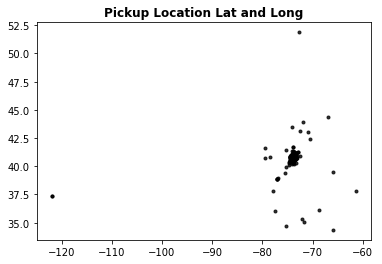

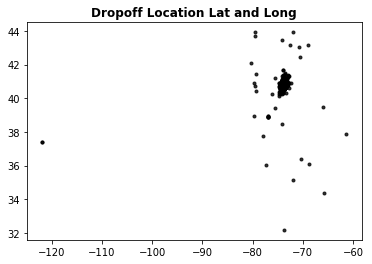

In [13]:
plt.plot(train_df['pickup_longitude'], train_df['pickup_latitude'], '.', color='k', alpha=0.8)
plt.title('Pickup Location Lat and Long', weight = 'bold')
plt.show()

plt.plot(train_df['dropoff_longitude'], train_df['dropoff_latitude'], '.', color='k', alpha=0.8)
plt.title('Dropoff Location Lat and Long', weight = 'bold')
plt.show()

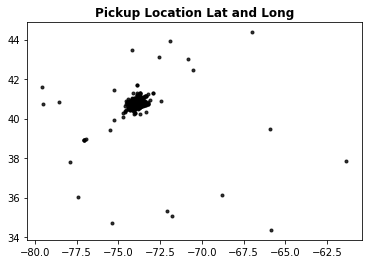

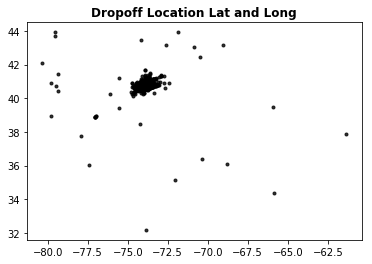

In [14]:
train_df = train_df[train_df.pickup_latitude != 51.881084442138672]

train_df = train_df[train_df.pickup_longitude != -121.93334197998048]

train_df = train_df[train_df.dropoff_longitude != -121.93320465087892]

#train_df = train_df[train_df.dropoff_latitude != 32.181140899658203]

plt.plot(train_df['pickup_longitude'], train_df['pickup_latitude'], '.', color='k', alpha=0.8)
plt.title('Pickup Location Lat and Long', weight = 'bold')
plt.show()

plt.plot(train_df['dropoff_longitude'], train_df['dropoff_latitude'], '.', color='k', alpha=0.8)
plt.title('Dropoff Location Lat and Long', weight = 'bold')
plt.show()

In [15]:
mean_p_lat = np.mean(train_df['pickup_latitude'])
mean_p_lon = np.mean(train_df['pickup_longitude'])

print (mean_p_lat)
print (mean_p_lon)

40.75092291424869
-73.9734244979376


In [16]:
#--- Standard deviation of pickup & dropoff Lats and Longs ---
std_p_lat = np.std(train_df['pickup_latitude'])
std_p_lon = np.std(train_df['pickup_longitude'])

print (std_p_lat)
print (std_p_lon)

0.031306360535317025
0.0432490258539654


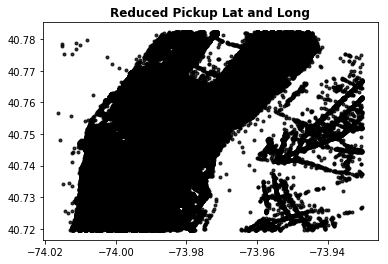

In [17]:
min_p_lat = mean_p_lat - std_p_lat
max_p_lat = mean_p_lat + std_p_lat
min_p_lon = mean_p_lon - std_p_lon
max_p_lon = mean_p_lon + std_p_lon

locations = train_df[(train_df.pickup_latitude > min_p_lat) & (train_df.pickup_latitude < max_p_lat) & (train_df.pickup_longitude > min_p_lon) & (train_df.pickup_longitude < max_p_lon)]

plt.plot(locations['pickup_longitude'], locations['pickup_latitude'], '.', color='k', alpha=0.8)
plt.title('Reduced Pickup Lat and Long', weight = 'bold')
plt.show()

In [18]:
min_p_lat = mean_p_lat - (3 * std_p_lat)
max_p_lat = mean_p_lat + (3 * std_p_lat)
min_p_lon = mean_p_lon - (3 * std_p_lon)
max_p_lon = mean_p_lon + (3 * std_p_lon)
'''
locations = train_df[(train_df.pickup_latitude > min_p_lat) & (train_df.pickup_latitude < max_p_lat) & (train_df.pickup_longitude > min_p_lon) & (train_df.pickup_longitude < max_p_lon)]

plt.plot(locations['pickup_longitude'], locations['pickup_latitude'], '.', color='k', alpha=0.8)
plt.title('Reduced Pickup Lat and Long', weight = 'bold')
plt.show()
'''

"\nlocations = train_df[(train_df.pickup_latitude > min_p_lat) & (train_df.pickup_latitude < max_p_lat) & (train_df.pickup_longitude > min_p_lon) & (train_df.pickup_longitude < max_p_lon)]\n\nplt.plot(locations['pickup_longitude'], locations['pickup_latitude'], '.', color='k', alpha=0.8)\nplt.title('Reduced Pickup Lat and Long', weight = 'bold')\nplt.show()\n"

In [19]:
min_p_lat = mean_p_lat - (4 * std_p_lat)
max_p_lat = mean_p_lat + (4 * std_p_lat)
min_p_lon = mean_p_lon - (4 * std_p_lon)
max_p_lon = mean_p_lon + (4 * std_p_lon)
'''
locations = train_df[(train_df.pickup_latitude > min_p_lat) & (train_df.pickup_latitude < max_p_lat) & (train_df.pickup_longitude > min_p_lon) & (train_df.pickup_longitude < max_p_lon)]

plt.plot(locations['pickup_longitude'], locations['pickup_latitude'], '.', color='k', alpha=0.8)
plt.title('Reduced Pickup Lat and Long', weight = 'bold')
plt.show()
'''

"\nlocations = train_df[(train_df.pickup_latitude > min_p_lat) & (train_df.pickup_latitude < max_p_lat) & (train_df.pickup_longitude > min_p_lon) & (train_df.pickup_longitude < max_p_lon)]\n\nplt.plot(locations['pickup_longitude'], locations['pickup_latitude'], '.', color='k', alpha=0.8)\nplt.title('Reduced Pickup Lat and Long', weight = 'bold')\nplt.show()\n"

In [20]:
min_p_lat = mean_p_lat - (10 * std_p_lat)
max_p_lat = mean_p_lat + (10 * std_p_lat)
min_p_lon = mean_p_lon - (10 * std_p_lon)
max_p_lon = mean_p_lon + (10 * std_p_lon)
'''
locations = train_df[(train_df.pickup_latitude > min_p_lat) & (train_df.pickup_latitude < max_p_lat) & (train_df.pickup_longitude > min_p_lon) & (train_df.pickup_longitude < max_p_lon)]

plt.plot(locations['pickup_longitude'], locations['pickup_latitude'], '.', color='k', alpha=0.8)
plt.title('Reduced Pickup Lat and Long', weight = 'bold')
plt.show()
'''

"\nlocations = train_df[(train_df.pickup_latitude > min_p_lat) & (train_df.pickup_latitude < max_p_lat) & (train_df.pickup_longitude > min_p_lon) & (train_df.pickup_longitude < max_p_lon)]\n\nplt.plot(locations['pickup_longitude'], locations['pickup_latitude'], '.', color='k', alpha=0.8)\nplt.title('Reduced Pickup Lat and Long', weight = 'bold')\nplt.show()\n"

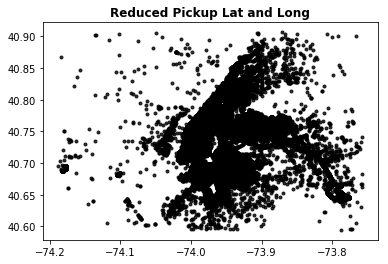

In [21]:
min_p_lat = mean_p_lat - (5 * std_p_lat)
max_p_lat = mean_p_lat + (5 * std_p_lat)
min_p_lon = mean_p_lon - (5 * std_p_lon)
max_p_lon = mean_p_lon + (5 * std_p_lon)

locations = train_df[(train_df.pickup_latitude > min_p_lat) & (train_df.pickup_latitude < max_p_lat) & (train_df.pickup_longitude > min_p_lon) & (train_df.pickup_longitude < max_p_lon)]

plt.plot(locations['pickup_longitude'], locations['pickup_latitude'], '.', color='k', alpha=0.8)
plt.title('Reduced Pickup Lat and Long', weight = 'bold')
plt.show()

In [22]:
print(len(train_df))
print(len(locations))

#--- making a duplicate copy of the df to work on ---
locations_1 = locations
print(locations_1.head())

1456569
1456057
          id  vendor_id     pickup_datetime    dropoff_datetime  \
0  id2875421          2 2016-03-14 17:24:55 2016-03-14 17:32:30   
1  id2377394          1 2016-06-12 00:43:35 2016-06-12 00:54:38   
2  id3858529          2 2016-01-19 11:35:24 2016-01-19 12:10:48   
3  id3504673          2 2016-04-06 19:32:31 2016-04-06 19:39:40   
4  id2181028          2 2016-03-26 13:30:55 2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag         ...           bearing_dist  \
0         40.765602                  N         

In [23]:
labels = train_df['trip_duration']

In [24]:
# --- Converting the categorical variables to numerical variables ---
df_s_f_train = pd.get_dummies(train_df['store_and_fwd_flag'])
df_s_f_test = pd.get_dummies(test_df['store_and_fwd_flag'])

# --- Join the dummy variables to the main dataframe ---
train_df = pd.concat([train_df, df_s_f_train], axis=1)
test_df = pd.concat([test_df, df_s_f_test], axis=1)

# --- Drop the categorical column ---
train_df.drop('store_and_fwd_flag', axis=1, inplace=True)
test_df.drop('store_and_fwd_flag', axis=1, inplace=True)

In [25]:
train_df = train_df.loc[:,~train_df.columns.duplicated()]
test_df = test_df.loc[:,~test_df.columns.duplicated()]

In [26]:
train_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'Haversine_dist', 'bearing_dist', 'Manhattan_dist', 'pickup_month',
       'pickup_day', 'pickup_hour', 'dropoff_month', 'dropoff_day',
       'dropoff_hour', 'trip_duration_mins', 'trip_duration_hours', 'N', 'Y'],
      dtype='object')

In [27]:
train_df.drop('id', axis=1, inplace=True)

In [28]:
b_train = train_df.drop(['pickup_datetime','dropoff_datetime','dropoff_hour', 'dropoff_month', 'dropoff_day', 'trip_duration', 'trip_duration_mins', 'trip_duration_hours'], 1)
b_label = train_df['trip_duration']
print(b_train.head())
print(b_label.head())

test = test_df
test = test.drop(['pickup_datetime','id'], 1)
print(test.head())

   vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          2                1        -73.982155        40.767937   
1          1                1        -73.980415        40.738564   
2          2                1        -73.979027        40.763939   
3          2                1        -74.010040        40.719971   
4          2                1        -73.973053        40.793209   

   dropoff_longitude  dropoff_latitude  Haversine_dist  bearing_dist  \
0         -73.964630         40.765602        1.497580     99.970196   
1         -73.999481         40.731152        1.804374   -117.153768   
2         -74.005333         40.710087        6.381090   -159.680165   
3         -74.012268         40.706718        1.484566   -172.737700   
4         -73.972923         40.782520        1.187842    179.473585   

   Manhattan_dist  pickup_month  pickup_day  pickup_hour  N  Y  
0        0.019859             3           0           17  1  0  
1        0.026478           

In [29]:
b_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Haversine_dist,bearing_dist,Manhattan_dist,pickup_month,pickup_day,pickup_hour,N,Y
0,2,1,-73.982155,40.767937,-73.964630,40.765602,1.497580,99.970196,0.019859,3,0,17,1,0
1,1,1,-73.980415,40.738564,-73.999481,40.731152,1.804374,-117.153768,0.026478,6,6,0,1,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,6.381090,-159.680165,0.080158,1,1,11,1,0
3,2,1,-74.010040,40.719971,-74.012268,40.706718,1.484566,-172.737700,0.015480,4,2,19,1,0
4,2,1,-73.973053,40.793209,-73.972923,40.782520,1.187842,179.473585,0.010818,3,5,13,1,0


In [33]:
#---Setting up and training Gradient Boosting Regressor---#

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')
GBR.fit(b_train, b_label)

print (GBR)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)


# Before we split the train dataset into train and validation, we wanted to see the feature importance using overall training dataset. Hence, built a GBR model on entire training dataset

In [34]:
features_list = b_train.columns.values
feature_importance = GBR.feature_importances_
sorted_idx = np.argsort(feature_importance)

print(sorted_idx)

[ 0  1  3  4  9 12 13  2  7 10  8  5 11  6]


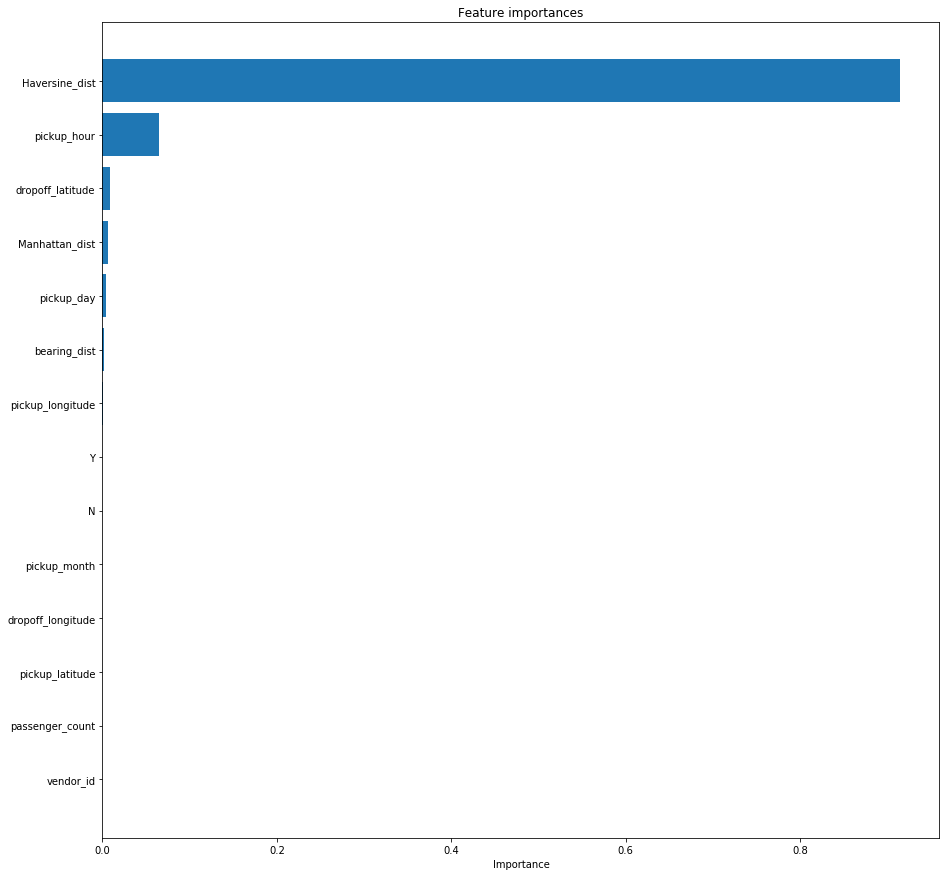

In [35]:
plt.figure(figsize=(15, 15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, max_depth=5, random_state=0, loss='ls')
score = cross_val_score(GBR, b_train, b_label, cv = 10, scoring = 'neg_mean_squared_log_error')
np.mean(np.sqrt(score * -1))

0.666686881068223

# Now, I am choosing different set of features to build another model

In [40]:
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## dates
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])

In [41]:
## transform character to numeric
le = LabelEncoder()
le.fit(train['store_and_fwd_flag'])
train['store_and_fwd_flag'] = le.transform(train['store_and_fwd_flag'])
test['store_and_fwd_flag'] = le.transform(test['store_and_fwd_flag'])

In [42]:
## date features
train['month'] = train['pickup_datetime'].dt.month
train['day'] = train['pickup_datetime'].dt.day
train['weekday'] = train['pickup_datetime'].dt.weekday
train['hour'] = train['pickup_datetime'].dt.hour
train['minute'] = train['pickup_datetime'].dt.minute

test['month'] = test['pickup_datetime'].dt.month
test['day'] = test['pickup_datetime'].dt.day
test['weekday'] = test['pickup_datetime'].dt.weekday
test['hour'] = test['pickup_datetime'].dt.hour
test['minute'] = test['pickup_datetime'].dt.minute

In [43]:
train['dist_long'] = train['pickup_longitude'] - train['dropoff_longitude']
test['dist_long'] = test['pickup_longitude'] - test['dropoff_longitude']

train['dist_lat'] = train['pickup_latitude'] - train['dropoff_latitude']
test['dist_lat'] = test['pickup_latitude'] - test['dropoff_latitude']

train['dist'] = np.sqrt(np.square(train['dist_long']) + np.square(train['dist_lat']))
test['dist'] = np.sqrt(np.square(test['dist_long']) + np.square(test['dist_lat']))

In [44]:
## train/test features, y, id
xtrain = train.drop(['id', 'pickup_datetime', 'dropoff_datetime', 'trip_duration'], axis = 1).as_matrix()
xtest = test.drop(['id', 'pickup_datetime', ], axis = 1).as_matrix()
ytrain = train['trip_duration'].values
id_train = train['id'].values
id_test = test['id'].values
#del(train, test)

In [45]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'month', 'day', 'weekday', 'hour', 'minute',
       'dist_long', 'dist_lat', 'dist'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(xtrain,ytrain,test_size=0.2,random_state=0)

In [57]:
## xgb parameters
params = {
    'booster':            'gbtree',
    'objective':          'reg:linear',
    'learning_rate':      0.1,
    'max_depth':          14,
    'subsample':          0.8,
    'colsample_bytree':   0.7,
    'colsample_bylevel':  0.7,
    'silent':             1
}

In [58]:
## number of rounds
nrounds = 100

In [61]:
import xgboost as xgboost
#gbm = xgboost.XGBRegressor()

In [71]:
print('Train model...')
dtrain = xgboost.DMatrix(X_train, np.log(y_train+1))
gbm = xgboost.train(params,
                dtrain,
                num_boost_round = nrounds)

Train model...


In [72]:
pred_test_split = np.exp(gbm.predict(xgboost.DMatrix(X_test))) - 1

In [80]:
print("Root mean square error for test dataset: {}".format(np.round(np.sqrt(mean_squared_error(y_test, pred_test_split)), 2)))

Root mean square error for test dataset: 7217.4


In [74]:
import math
#def rmsle(y, y_pred):
#assert len(y) == len(y_pred)
terms_to_sum = [(math.log(pred_test_split[i] + 1) - math.log(y_test[i] + 1)) ** 2.0 for i,pred in enumerate(pred_test_split)]
print ((sum(terms_to_sum) * (1.0/len(y_test))) ** 0.5)

0.3831912302352567


# We got a RMSLE of 0.38 which is a huge improvement over other models. Hence, we will fit our model using these features and predict the value for test dataset

In [68]:
## train model on overall test dataset
print('Train model...')
dtrain = xgboost.DMatrix(xtrain, np.log(ytrain+1))
gbm = xgboost.train(params,
                dtrain,
                num_boost_round = nrounds)

Train model...


In [69]:
## test predictions
pred_test = np.exp(gbm.predict(xgboost.DMatrix(xtest))) - 1

In [70]:
df = pd.DataFrame({'id': id_test, 'trip_duration': pred_test}) 
df = df.set_index('id')
df.to_csv('mayanka_jha.csv', index = True)